<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [30]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
df=pd.read_csv("../results/data_encoded.csv")
df

,is_fraudulent,amount_robust,customer_age_robust,card_type_Discover,card_type_MasterCard,card_type_Visa,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0,0.160768,-0.038462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-0.601375,0.653846,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,-0.730347,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.528392,0.576923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,-0.603639,-0.307692,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9982,1,0.788477,-0.307692,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9983,0,-0.971162,-0.076923,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9984,0,0.274397,-0.307692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9985,1,-0.416508,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
vr="is_fraudulent"
modelo = sp.AnalisisModelosClasificacion(df, vr)

In [33]:
modelo.ajustar_modelo("logistic_regression")

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

In [34]:
modelo.calcular_metricas("logistic_regression")

,train,test
accuracy,0.505195,0.513013
precision,0.255222,0.263182
recall,0.505195,0.513013
f1,0.339121,0.347892
kappa,0.000000,0.000000
auc,0.500000,0.500000


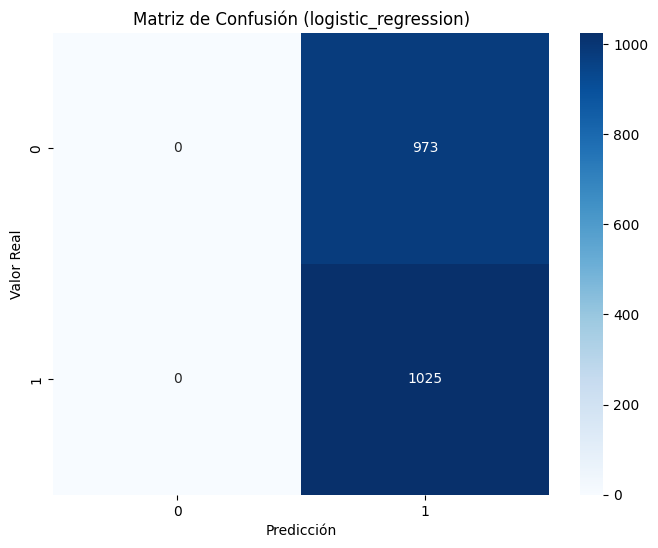

In [35]:
modelo.plot_matriz_confusion("logistic_regression")

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Asumiendo que ya tienes las predicciones del modelo y los valores reales
# Supongamos que `y_true` son las etiquetas reales y `y_pred_probs` son las probabilidades predichas

# Obtener los valores reales y las probabilidades predichas
y_test = modelo_clasificacion.
y_pred_test = modelo_clasificacion.

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

SyntaxError: invalid syntax (2580803951.py, line 8)